In [1]:
import numpy as np
import scipy.sparse as sp

from mnist import MNIST

In [2]:
from least_squares import ridge, analyze_results

In [3]:
import pandas as pd
%matplotlib inline

In [4]:
mndata = MNIST('./python-mnist/data')
train_ims, train_labels = mndata.load_training()
test_ims, test_labels = mndata.load_testing()

train_ims = np.array(train_ims)
test_ims = np.array(test_ims)
train_istwo = np.array([int(x==2) for x in train_labels])
test_istwo = np.array([int(x==2) for x in test_labels])

In [5]:
train_X = sp.csc_matrix(train_ims)
train_y = sp.csc_matrix([train_istwo]).T

In [6]:
weights = ridge(X = train_X, y = train_y, lam = 0.05)

/Users/janet/miniconda3/envs/mlpy3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:247: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/janet/miniconda3/envs/mlpy3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:165: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


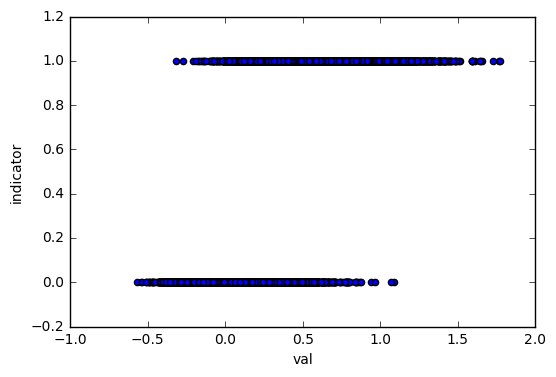

In [7]:
to_compare = pd.DataFrame({
       'val': train_X.dot(weights).toarray()[:, 0],
       'indicator': train_y.toarray()[:,0]})

to_compare.plot(kind='scatter', x='val', y='indicator')

In [8]:
from least_squares import ridge, analyze_results

In [ ]:
analyze_results(train_X, train_y, weights, 0.29)

> /Users/janet/Machine_Learning_CSE_546/HW1/Q6_least_squares/least_squares.py(28)analyze_results()
-> assert type(X) == sp.csc_matrix or type(X) == sp.csr_matrix
(Pdb) n
> /Users/janet/Machine_Learning_CSE_546/HW1/Q6_least_squares/least_squares.py(29)analyze_results()
-> assert type(y) == sp.csr_matrix or type(y) == sp.csc_matrix
(Pdb) 
> /Users/janet/Machine_Learning_CSE_546/HW1/Q6_least_squares/least_squares.py(31)analyze_results()
-> y_predictions = X.dot(coeff).toarray()[:, 0]
(Pdb) 
> /Users/janet/Machine_Learning_CSE_546/HW1/Q6_least_squares/least_squares.py(32)analyze_results()
-> truth = y.toarray()[:,0]
(Pdb) 
> /Users/janet/Machine_Learning_CSE_546/HW1/Q6_least_squares/least_squares.py(35)analyze_results()
-> ys_for_3s = y_predictions[truth ==1]
(Pdb) 
> /Users/janet/Machine_Learning_CSE_546/HW1/Q6_least_squares/least_squares.py(36)analyze_results()
-> ys_for_other_numbers = y_predictions[truth == 0]
(Pdb) 
> /Users/janet/Machine_Learning_CSE_546/HW1/Q6_least_squares/least_sq